### 한국어 형태소 분석
- 한국어로 된 문장에서 명사, 형용사, 조사 등을 추출하는 것.
- 서울대학교, 트위터, 메타 등등에서 라이브러리를 만들어 배포하고 있다.
- 현재 완벽하게 형태소를 분리해 낼 수 있는 라이브러리는 존재하지 않는다.
- JDK 8 버전이 필요하다.

### konlpy
- nlpy 라는 라이브러리를 한국어에 맞게끔 만든 라이브러리
- nlpy는 영어 문장의 형태소를 분리해내는 라이브러리
- konlpy 라이브러이에는 서울대, 트위터, 메타 등등에서 만든 형태소 분리 라이브러리가 모두 포함되어 있다.
- JDK 8 버전 설치가 필요하다.

[JDK 설치]
- 제공한 jdk 설치파일을 실행하여 설치한다
- 설치 과정에서 변경하는 것은 없고 다음 다음 finish 만 잘 눌러준다.

[윈도우에서 환경변수 설정]
- jdk가 설치된 경로를 다른 프로그램들이 알 수 있도록 설정한다.
- 먼저 jdk가 설치된 경로를 파악한다.
- C:\Program Files\Java\jdk1.8.0_341
- 탐색기의 내 PC에서 마우스 우클릭하고 속성을 눌러준다.
- 우클릭해서 나오는 화면에서 고급시스템설정을 눌러준다.
- 고급시스템설정 창에서 아래에 있는 환경변수설정 버튼을 눌러준다.
- 환경 변수 창에 있는 새로 만들기 버튼을 눌러준다(아무거나 하셔도 됩니다)
- 변수이름 : JAVA_HOME
- 변수 값 : 아까 복사한 jdk의 경로

[필요한 라이브러리 설치]
- pip install konlpy==0.6.0

### 워드 클라우드를 사용하기 위한 설정
- pip install pytagcloud
- pip install pygame
- pip install simplejson

In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil

# 경고 뜨지 않게..
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 랜덤 모듈 
import random

# 학습 모델 저장 및 복원
import pickle

# 딥러닝 라이브러리
import tensorflow as tf
# 신경망 모델을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형 회귀 레이어
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 객체
from tensorflow.keras.layers import Activation
# CNN : 커널을 통해 합성곱을 구하는 것. 이미지의 특징이 두드러 지게 한다.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D
# MaxPooling : 커널내에서 가장 큰 값을 추출하는 방식으로 불필요한 부분을 제거한다.
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPool1D
# Flatten : 다차원의 이미지 데이터를 선형 회귀 은닉층으로 전달하기 전에
# 1차원으로 변환하는 것
from tensorflow.keras.layers import Flatten
# Dropout : 이미지나 영상, 음파 등의 데이터는 오랫동안 학습을 진행 시켜야 한다.
# 하지만 너무 빨리 과적합이 발생되면 조기 중단 때문에 학습 횟수가 줄어들 수 있다.
# 이에 은닉의 노드를 일부 사용하지 않으므로써 과적합이 빨리 오는 것을 예방하고
# 오랫동한 학습이 진행될 수 있도록 한다.
from tensorflow.keras.layers import Dropout
# Embedding : 단어의 수를 조정한다.
from tensorflow.keras.layers import Embedding

# LSTM
from tensorflow.keras.layers import LSTM



# 원핫 인코딩을 수행하는 함수
from tensorflow.keras.utils import to_categorical

# 저장된 학습모델을 복원한다.
from tensorflow.keras.models import load_model

# 모델을 자동 저장한다.
from tensorflow.keras.callbacks import ModelCheckpoint
# 성능이 더이상 좋아지지 않을 경우 중단 시킨다.
from tensorflow.keras.callbacks import EarlyStopping

# 문장을 잘라준다.
from tensorflow.keras.preprocessing.text import Tokenizer
# 모든 문장 데이터의 단어 데이터의 수를 동일한 수로 맞춰준다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문자열을 가지고 단어 사전을 만들어준다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence



# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# 문자열 -> 숫자
from sklearn.preprocessing import LabelEncoder

# 전체데이터를 학습용과 검증으로 나눈다.
from sklearn.model_selection import train_test_split

# 랜덤시드 설정
# 데이터를 랜덤하게 섞거나 가중치를 랜덤하게 설정하는 등..
# 작업에서 랜덤을 적용하는 경우가 더러 있다.
# 이에, 시드를 고정시킨다.
random_seed = 1

np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# 현재 프로젝트에서 GPU 메모리 사용을 필요한 만큼만 쓸 수 있도록 한다.
# 컴퓨터에 있는 GPU 정보들을 가져온다.
gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면...
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

In [2]:
# 한국어 형태소 분석
from konlpy.tag import Okt, Hannanum, Kkma, Mecab, Komoran

# 워드 클라우드
from collections import Counter
import pytagcloud
from IPython.display import Image

pygame 2.1.2 (SDL 2.0.18, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


### 형태소 분리 예제

In [3]:
a1 = '동해물과 백두산이 마르고 닳도록'

In [4]:
# 형태소 분석기 생성
tagger1 = Okt()
tagger2 = Kkma()
tagger3 = Hannanum()
tagger4 = Komoran()

print(tagger1.morphs(a1))
print(tagger2.morphs(a1))
print(tagger3.morphs(a1))
print(tagger4.morphs(a1))

['동', '해물', '과', '백두산', '이', '마르고', '닳도록']
['동하', '어', '물', '과', '백두산', '이', '마르', '고', '닳', '도록']
['동해물', '과', '백두산', '이', '마르', '고', '닳', '도록']
['동해물과 백두산이', '마르고', '닳', '도록']


In [5]:
print(tagger1.nouns(a1))
print(tagger2.nouns(a1))
print(tagger3.nouns(a1))
print(tagger4.nouns(a1))

['해물', '백두산', '마르고']
['물', '백두산']
['동해물', '백두산']
['동해물과 백두산이', '마르고']


In [6]:
a1 = '똑바로 읽어도 우영우, 거꾸로 읽어도 우영우. 기러기, 토마토, 스위스'

In [7]:
print(tagger1.nouns(a1))
print(tagger2.nouns(a1))
print(tagger3.nouns(a1))
print(tagger4.nouns(a1))

['똑바로', '우영', '거꾸로', '우영', '기러기', '토마토', '스위스']
['우', '우영우', '영우', '우영', '기러기', '토마토', '스위스']
['우영우,', '우영우', '기러기', '토마토', '스위스']
['우영', '우', '우영', '우', '기러기', '토마토', '스위스']


### 데이터를 읽어온다.

In [8]:
df = pd.read_csv('./11_data.csv')
df

,title,description
0,"손흥민 향해 '눈 찢기'한 男의 최후…""경기장 영구 출입금지""",잉글랜드 프로축구 프리미어리그(EPL)에서 뛰는 손흥민(30·토트넘)에게 인종 차별...
1,손흥민 대신 히샬리송? 결국 골이다,손흥민(30·토트넘)의 시즌 초반 행보를 놓고 현지에서 또 말이 나오고 있다. 손흥...
2,"‘수비 좀 해!’ 주장 요리스, 또 경기중 손흥민 질책",잉글랜드 프로축구 프리미어리그 토트넘에서 뛰는 손흥민(30)이 팀의 주장이자 주전 ...
3,"손흥민이 아직도 무득점이라니…""몇 골 넣으면 달라질 것""",손흥민(토트넘)이 시즌 초반 어려움을 겪고 있다. 손흥민이 올 시즌 아직 득점을 올...
4,"""교체 아웃이 어색한 손흥민, 행복하지 않아 보였다""…토트넘 출신 해설가 우...",토트넘 출신 해설가 오하라가 손흥민의 교체에 대해 아쉬움을 나타냈다. 오하라는 22...
...,...,...
995,이제 손흥민 경기도 유료채널로만… 토트넘-사우스햄튼전부터,지난 시즌 '슈퍼 쏘니' 손흥민이 모하메드 살라와 공동 득점왕을 차지하면서 국내 축...
996,"[토트넘 경기일정] 손흥민, 첼시전 출전여부는? 중계·전적·영입선수 알아보...",손흥민 (출처=대한축구협회) 손흥민이 시즌1호골을 노린다. 토트넘은 15일 0시 3...
997,"CBS전문가, EPL 올해의 선수로 손흥민 예측..""다크호스""",한 미국 매체의 전문가가 '손세이셔널' 손흥민(토트넘)을 2022~2023시즌 잉글...
998,"두 번 울었던 손흥민, ‘삼세판 월드컵’은 웃자","손흥민(토트넘)은 이번엔 반드시 웃겠다는 각오다. 2014년 브라질, 2018년 러..."


In [9]:
# 결측치 확인
df.isna().sum()

title          0
description    0
dtype: int64

### 한글 정제

In [10]:
import re

# 주어진 문장에서 한글만 추출해 반환하는 함수
def text_cleaning(text) :
    # 한글 정규식(띄어쓰기, ㄱ ~ ㅣ, 가 ~ 힣)
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    # 정규식에 위배되는 글자들은 길이가 0인 문자열로 변환한다.
    result = hangul.sub('', text)
    return result

In [11]:
a1 = '가나ㄱㄴab!@#324다라'
text_cleaning(a1)

'가나ㄱㄴ다라'

In [12]:
# 한글 정제
df['title'] = df['title'].apply(lambda x : text_cleaning(x))
df['description'] = df['description'].apply(lambda x : text_cleaning(x))

In [13]:
df

,title,description
0,손흥민 향해 눈 찢기한 의 최후경기장 영구 출입금지,잉글랜드 프로축구 프리미어리그에서 뛰는 손흥민토트넘에게 인종 차별적 행위를 한 팬이...
1,손흥민 대신 히샬리송 결국 골이다,손흥민토트넘의 시즌 초반 행보를 놓고 현지에서 또 말이 나오고 있다 손흥민은 지난 ...
2,수비 좀 해 주장 요리스 또 경기중 손흥민 질책,잉글랜드 프로축구 프리미어리그 토트넘에서 뛰는 손흥민이 팀의 주장이자 주전 골키퍼인...
3,손흥민이 아직도 무득점이라니몇 골 넣으면 달라질 것,손흥민토트넘이 시즌 초반 어려움을 겪고 있다 손흥민이 올 시즌 아직 득점을 올리지 ...
4,교체 아웃이 어색한 손흥민 행복하지 않아 보였다토트넘 출신 해설가 우,토트넘 출신 해설가 오하라가 손흥민의 교체에 대해 아쉬움을 나타냈다 오하라는 일현지...
...,...,...
995,이제 손흥민 경기도 유료채널로만 토트넘사우스햄튼전부터,지난 시즌 슈퍼 쏘니 손흥민이 모하메드 살라와 공동 득점왕을 차지하면서 국내 축구 ...
996,토트넘 경기일정 손흥민 첼시전 출전여부는 중계전적영입선수 알아보,손흥민 출처대한축구협회 손흥민이 시즌호골을 노린다 토트넘은 일 시 분 영국 런던의 ...
997,전문가 올해의 선수로 손흥민 예측다크호스,한 미국 매체의 전문가가 손세이셔널 손흥민토트넘을 시즌 잉글랜드 프리미어리그 올해의...
998,두 번 울었던 손흥민 삼세판 월드컵은 웃자,손흥민토트넘은 이번엔 반드시 웃겠다는 각오다 년 브라질 년 러시아 대회에선 모두 조...


In [14]:
# 모든 문장을 하나의 문장으로 합쳐준다.
title_corpus = ''.join(df['title'])
description_corpus = ''.join(df['description'])

In [15]:
# 손흥민을 삭제한다.
title_corpus = title_corpus.replace('손흥민', '')
description_corpus = description_corpus.replace('손흥민', '')

In [16]:
# 명사만 추출한다.
tagger = Okt()

title_nouns = tagger.nouns(title_corpus)
description_nous = tagger.nouns(description_corpus)

In [17]:
# 각 단어에 대한 빈도수를 계산한다.
title_count = Counter(title_nouns)
description_count = Counter(description_nous)

print(title_count)
print(description_count)

Counter({'첼시': 256, '토트넘': 251, '인종차별': 169, '황희': 168, '찬': 166, '골': 113, '득점': 99, '팬': 98, '전': 98, '시즌': 84, '경기': 74, '첫': 74, '울버햄튼': 72, '케인': 69, '발롱도르': 69, '더비': 64, '코리안': 58, '선발': 57, '후보': 57, '향': 56, '동료': 53, '침묵': 53, '눈': 52, '출입': 52, '금지': 52, '또': 50, '개막전': 48, '서경덕': 47, '평점': 47, '김민재': 43, '행위': 43, '조사': 41, '위': 38, '중계': 35, '무기한': 34, '구단': 34, '도전': 34, '교체': 33, '경기일정': 33, '리스': 32, '무승부': 32, '인': 32, '도움': 31, '선정': 28, '점': 26, '대결': 25, '선수': 25, '것': 24, '연속': 24, '년': 24, '처벌': 24, '분': 24, '중': 23, '벨레': 23, '수비': 22, '착수': 22, '번': 22, '항의': 21, '결승골': 21, '출전': 20, '무산': 20, '나폴리': 20, '공격': 20, '메시': 20, '새': 20, '일': 19, '포함': 19, '징계': 18, '은': 18, '명': 18, '임대': 18, '은돔': 18, '경기장': 17, '충돌': 17, '골대': 17, '최고': 17, '발표': 17, '평가': 17, '예상': 17, '영구': 16, '강력': 16, '조치': 16, '팀': 16, '제임스': 16, '주장': 15, '극적': 15, '레전드': 14, '공개': 14, '언쟁': 14, '치': 14, '개막': 14, '대응': 14, '먼저': 14, '오피': 14, '셜': 14, '가장': 14, '벤치': 14, '라인업': 14, '축구': 1

### 워드 클라우드
- 한글이 지원되는 폰트를 구해야한다(나눔폰트 등...)
- 폰트 파일을 다음 경로에 복사해준다.
- C:\Users\계정\anaconda3\Lib\site-packages\pytagcloud\fonts
- fonts폴더에 있는 fonts.json 파일을 메모장으로 열어준다.
- fonts.json 파일에 다음과 같이 넣어준다.

    {
		"name": "이름 아무거나",
		"ttf": "사용할 폰트 파일 이름",
		"web": "http://fonts.googleapis.com/css?family=Nobile"
	},

In [18]:
# 가장 빈도수가 많은 단어 100개를 선정한다.
ranked_title_tags = title_count.most_common(100)
ranked_description_tags = description_count.most_common(100)

In [19]:
# 워드 클라우드를 위한 단어사전을 만든다.
title_tag_list = pytagcloud.make_tags(ranked_title_tags)
description_tag_list = pytagcloud.make_tags(ranked_description_tags)

In [26]:
# title에 대한 워드 클라우드
pytagcloud.create_tag_image(title_tag_list, './son_title_word.jpg',
                           size=(320, 240), fontname='Korean', 
                            rectangular=False)

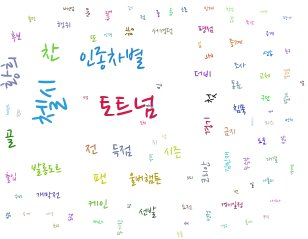

In [27]:
Image(filename='./son_title_word.jpg')

In [22]:
# description 에 대한 워드 클라우드
pytagcloud.create_tag_image(description_tag_list, 
                            './son_description_word.jpg',
                           size=(900, 600), fontname='Korean', 
                            rectangular=False)

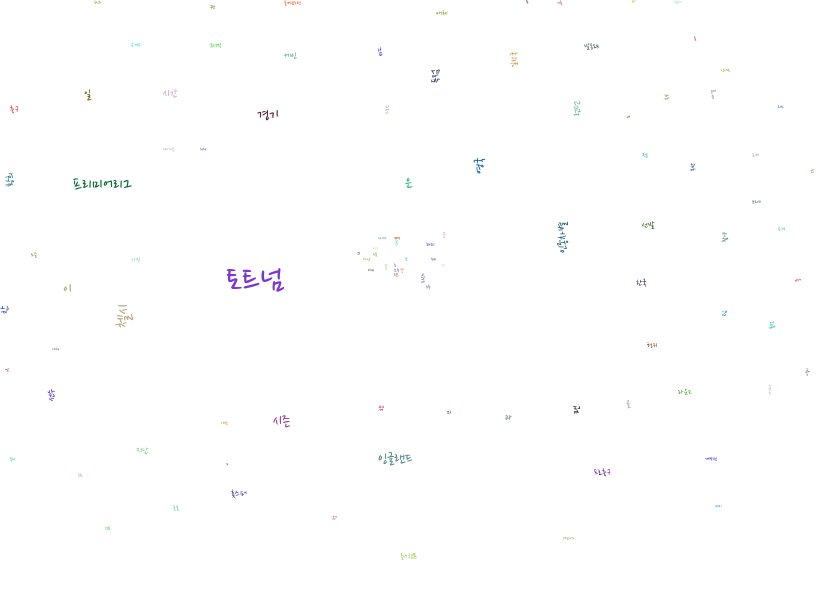

In [23]:
Image(filename='./son_description_word.jpg')